# Recommendation System


In [1]:
import numpy as np
import pandas as pd

In [2]:
FilmNames = ['Nemo', 'Mission', 'Jiro']
Features = ['BoxOffice', 'KidsFilm', 'FamousActors']

In [3]:
# now lets rate the features of the films
Nemo = np.array ([5,5,2])
Mission = np.array ([3,-5,5])
Jiro = np.array ([-4,-5,-5])

In [4]:
f_array = np.vstack([Nemo, Mission, Jiro])
f_array

array([[ 5,  5,  2],
       [ 3, -5,  5],
       [-4, -5, -5]])

In [5]:
# lets make a pandas dataframe
film_df = pd.DataFrame(f_array, index=FilmNames, columns=Features)
film_df

,BoxOffice,KidsFilm,FamousActors
Nemo,5,5,2
Mission,3,-5,5
Jiro,-4,-5,-5


In [6]:
# define users
UserNames = ['Jason', 'Paula', 'Sam']
Jason = np.array ([-3,2,-2])
Paula = np.array ([1,3,2])
Sam = np.array ([1,-2,2])

u_array = np.vstack([Jason, Paula, Sam])

In [7]:
u_array

array([[-3,  2, -2],
       [ 1,  3,  2],
       [ 1, -2,  2]])

In [8]:
# in a dataframe
user_df = pd.DataFrame (u_array, index=UserNames, columns=Features)
user_df

,BoxOffice,KidsFilm,FamousActors
Jason,-3,2,-2
Paula,1,3,2
Sam,1,-2,2


In [9]:
film_df['KidsFilm']

Nemo       5
Mission   -5
Jiro      -5
Name: KidsFilm, dtype: int64

In [10]:
film_df[0:1]

,BoxOffice,KidsFilm,FamousActors
Nemo,5,5,2


In [11]:
film_df.loc['Nemo']

BoxOffice       5
KidsFilm        5
FamousActors    2
Name: Nemo, dtype: int64

In [12]:
# Lets create our recommender
def content_recomm(user, film):
    return np.dot(user_df.loc[user].values, film_df.loc[film].values)

In [13]:
print content_recomm('Jason','Nemo')
print content_recomm('Jason','Mission')
print content_recomm('Jason','Jiro')

-9
-29
12


In [14]:
print content_recomm('Paula','Nemo')
print content_recomm('Paula','Mission')
print content_recomm('Paula','Jiro')

24
-2
-29


In [15]:
# so you would recommend Jiro to Jason and Nemo to Paula. But we shouls play with the score scale to see how it changes

# Now lets play with SVD


In [16]:
#We are going to play with data compression in an image

In [ ]:
#so we had a matrix of 1's and we want a to put in some zeros for our example

In [18]:
%pylab inline

M = np.ones((25,15))
M[5:8, 2:13] = 0
M[17:20, 2:13] = 0
M[8:17, 2:5] = 0
M[8:17, -5:-2] = 0

print 'The number of elements in M is {0}'.format(np.size(M))

Populating the interactive namespace from numpy and matplotlib
The number of elements in M is 375


<function matplotlib.pyplot.show>

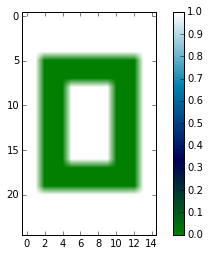

In [20]:
# let us visualise the image
fig =plt.figure()
ax=fig.add_subplot(111)
ax.set_aspect('equal')
plt.imshow(M, cmap=plt.cm.ocean)
plt.colorbar()
plt.show

In [21]:
# now the magic. Lets calculate the SVD
U, s, V = np.linalg.svd(M) # so it returns 3 things U s and V from the SVM formula

In [22]:
print shape(U)
print shape(s)
print shape(V)

(25, 25)
(15,)
(15, 15)


In [23]:
# 15 is the diagonal across the matrix that we talked about

In [24]:
s

array([  1.47242531e+01,   5.21662293e+00,   3.31409370e+00,
         6.50854725e-16,   1.80117819e-16,   1.40381004e-16,
         1.51119402e-32,   7.42165222e-33,   1.95312370e-33,
         8.27439921e-49,   1.88278125e-49,   2.61731759e-50,
         2.06789184e-65,   1.91845405e-66,   6.33417154e-67])

In [25]:
#from the fourth on they are not important, beware the weird notation that is 14 then 5.2

In [26]:
S=3
Sig = mat(np.eye(S)*s[:S])
Sig

matrix([[ 14.72425306,   0.        ,   0.        ],
        [  0.        ,   5.21662293,   0.        ],
        [  0.        ,   0.        ,   3.3140937 ]])

In [27]:
# eye creates the identity matrix 3 by 3 (we told it we want 3)

In [31]:
# but we want to minimise our U
# so reduce U and V
U_reduced = U[:,:S]
V_reduced = V[:S,:]
print shape(U_reduced)
print shape(V_reduced)

print 'The number of reduced elements is {0}'.format(S+size(U_reduced)+size(V_reduced))

(25, 3)
(3, 15)
The number of reduced elements is 123


<function matplotlib.pyplot.show>

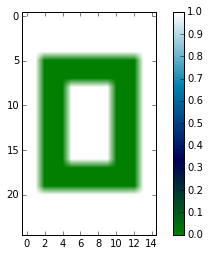

In [32]:
# reconstructing the image with zeros

M_rec = U_reduced * Sig * V_reduced

fig =plt.figure()
ax=fig.add_subplot(111)
ax.set_aspect('equal')
plt.imshow(M, cmap=plt.cm.ocean)
plt.colorbar()
plt.show

In [33]:
shape(U)

(25, 25)

In [34]:
shape(U_reduced)

(25, 3)

In [ ]:
# it got reduced!! MAGIC